# The Intern Group - Exploratory Data Analysis on Twitter Data

In [27]:
from collections import Counter
from tweet_parser.tweet import Tweet
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams

from wordcloud import WordCloud

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from utils import load_datasets

In [81]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
datasets = load_datasets()

### About datasets

In [4]:
for company in datasets:
    print("%s's Twitter account has %d tweets" % (company, len(datasets[company])))

GoAbroad's Twitter account has 3249 tweets
@naceorg's Twitter account has 3215 tweets
theinterngroup's Twitter account has 3226 tweets


## Hashtags

In [5]:
def most_frequent(company, datasets):
    hashtags = []
    for tweet in datasets[company]:
        tweet = Tweet(tweet)
        try:
            if tweet.hashtags:
                hashtags.extend(tweet.hashtags)
        except IndexError:
            pass
    print("%s:" % company)
    print(pd.DataFrame(Counter(hashtags).most_common(20), columns=['Hashtag', 'count']))

In [6]:
most_frequent('theinterngroup', datasets)

theinterngroup:
                    Hashtag  count
0              internabroad    268
1              careeradvice    176
2                internship    157
3            theinterngroup     97
4                    London     87
5             TravelTuesday     77
6                    Madrid     74
7          internshipabroad     65
8                    travel     63
9                  Colombia     59
10                 Medellin     57
11                 HongKong     54
12              StudyAbroad     49
13  internationalinternship     48
14                Australia     42
15                  funding     38
16                   intern     36
17              internships     34
18                Melbourne     33
19                  NewYork     31


In [7]:
most_frequent('GoAbroad', datasets)

GoAbroad:
             Hashtag  count
0        studyabroad    339
1             travel    208
2       internabroad    136
3    volunteerabroad    107
4             intled    106
5   StudyAbroadGoals     68
6         workabroad     53
7          Volunteer     51
8        Internships     50
9        teachabroad     48
10              TEFL     39
11       StudyAbroad     29
12      volunteering     29
13             Spain     28
14            France     27
15              Jobs     25
16             study     24
17             China     22
18              tefl     22
19       goabroadcom     22


In [8]:
most_frequent('@naceorg', datasets)

@naceorg:
             Hashtag  count
0     careerservices    661
1         recruiting    453
2             NACE18    237
3           NACEbite    151
4            interns     96
5         recruiters     71
6    WednesdayWisdom     66
7            NACEMLI     66
8         internship     47
9         Recruiters     41
10       internships     37
11            NACE19     35
12                co     35
13            hiring     30
14         interview     29
15            intern     25
16         jobsearch     25
17        Recruiting     24
18              jobs     19
19  MondayMotivation     17


## Retweets

In [9]:
dataset = 'theinterngroup'
d = Counter()
for tweet in datasets[dataset]:
    tweet = Tweet(tweet)
    if 'retweeted_status' in tweet:
        rt = tweet['retweeted_status']
        d[rt['text']] = rt['retweet_count'] 

In [10]:
for text, count in d.most_common(5):
    print("%d: %s\n" %(count, text))

232062: Help me out... https://t.co/maAC4rKMwF

344: Yes, success is great, but it’s failure that provides great learning — with the right mindset | on @EntMagazineME https://t.co/KxIWstN95Z

196: Why feeling uncomfortable is the key to success: https://t.co/8cwubrUSTk

181: Quote of the day: https://t.co/o7HlrhNWUK https://t.co/pE2LdHYCdr

71: Be your own motivation. #MotivationMonday https://t.co/8CnQp2bBNH



## WordClouds

### Cleaning data

In [102]:
def clean_data(dataset):
    corpus = [tweet['text'] for tweet in dataset]

    # Remove urls
    corpus = [re.sub(r"http\S+", "", doc) for doc in corpus]

    # Split into words
    corpus = [word_tokenize(doc) for doc in corpus]

    # Filter out punctuation
    corpus = [[word for word in doc if word.isalpha()] for doc in corpus]

    # Convert to lower case
    corpus = [[word.lower() for word in doc] for doc in corpus]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    corpus = [[word for word in doc if word not in stop_words] for doc in corpus]
    return corpus

In [103]:
def ngram_wordcloud(corpus, n):
    text = ""
    for doc in corpus:
        ngram = list(ngrams(doc, n))
        ngram = ["_".join(t) for t in ngram]
        text += " ".join(ngram) + " "
    wordcloud = WordCloud(max_font_size=50, min_font_size=5, max_words=100).generate(text)
    _ = plt.figure(figsize=(16, 12))
    _ = plt.imshow(wordcloud, interpolation='mitchell')
    _ = plt.axis('off') 

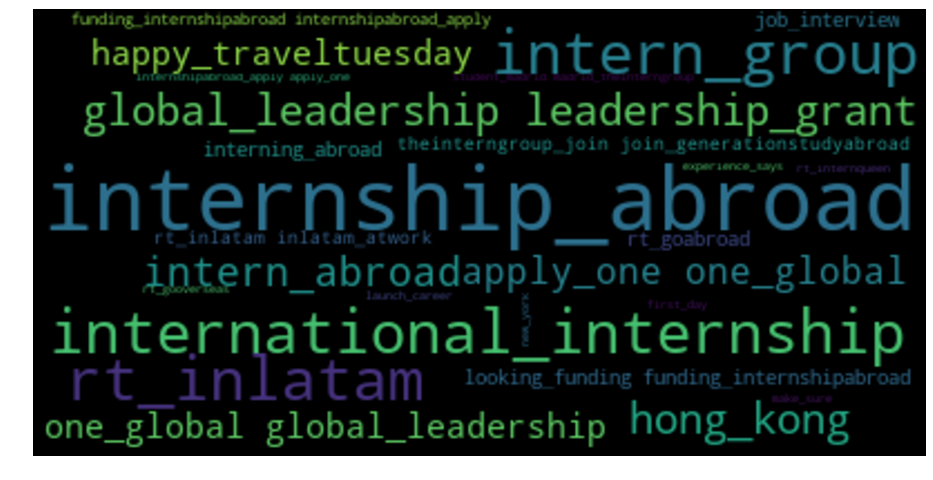

In [104]:
ngram_wordcloud(corpus=clean_data(datasets['theinterngroup']), n=2)

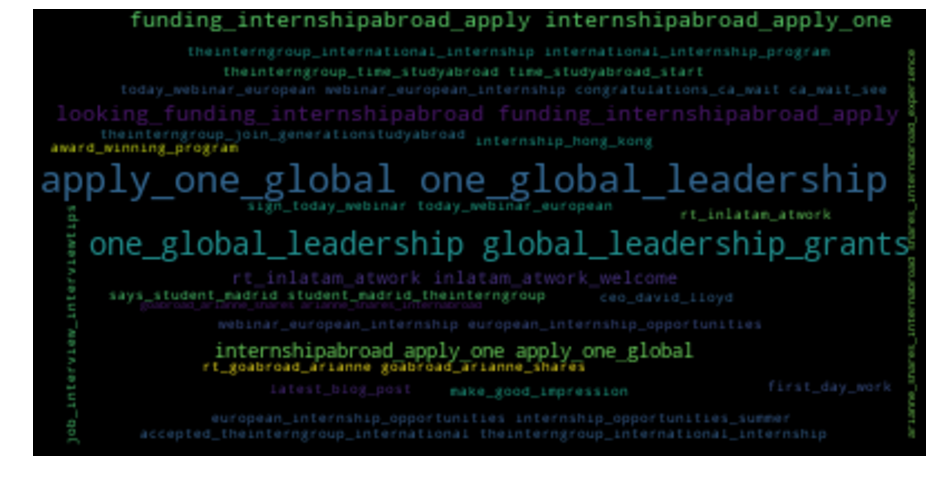

In [105]:
ngram_wordcloud(corpus=clean_data(datasets['theinterngroup']), n=3)

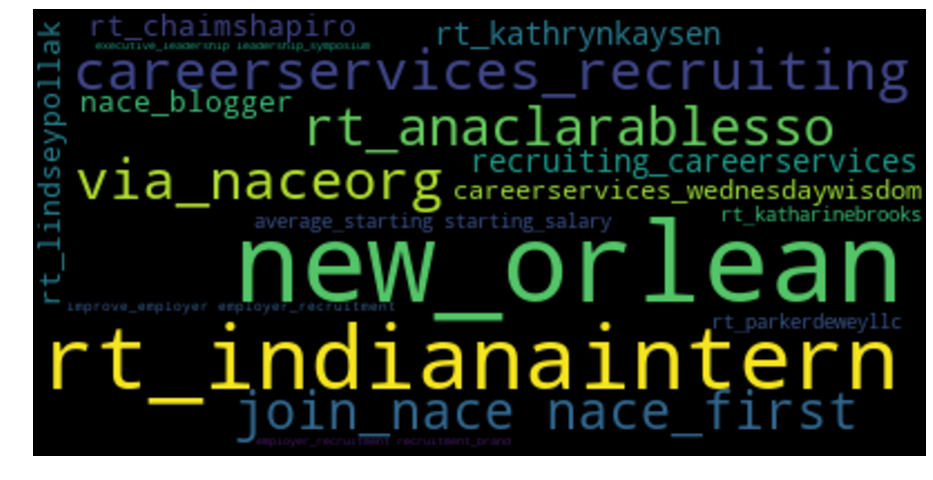

In [106]:
ngram_wordcloud(corpus=clean_data(datasets['@naceorg']), n=2)

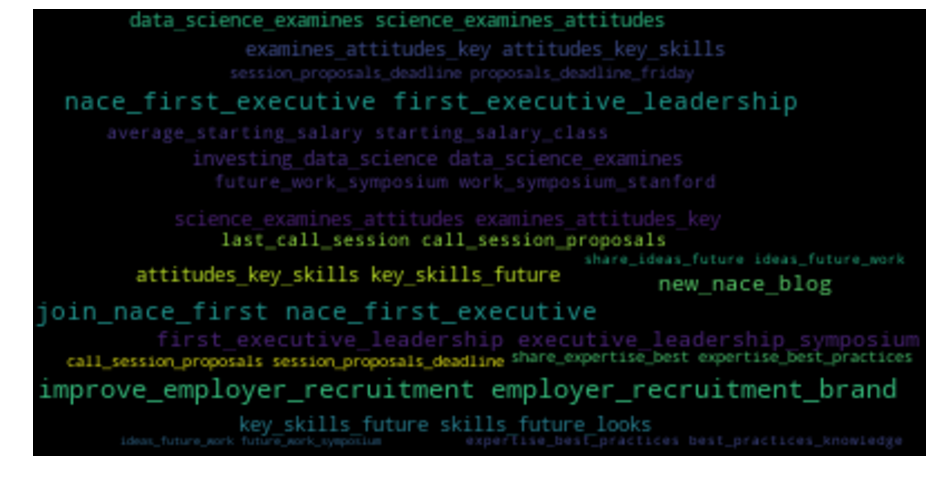

In [107]:
ngram_wordcloud(corpus=clean_data(datasets['@naceorg']), n=3)

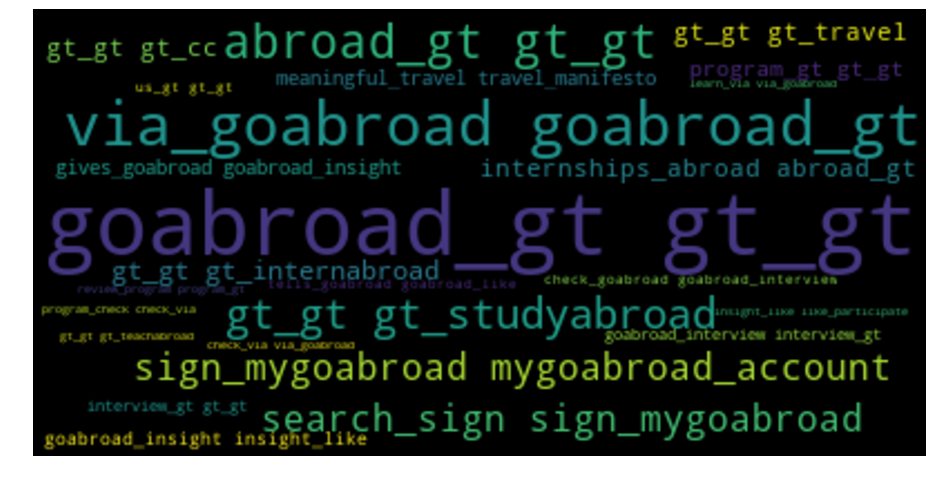

In [108]:
ngram_wordcloud(corpus=clean_data(datasets['GoAbroad']), n=2)

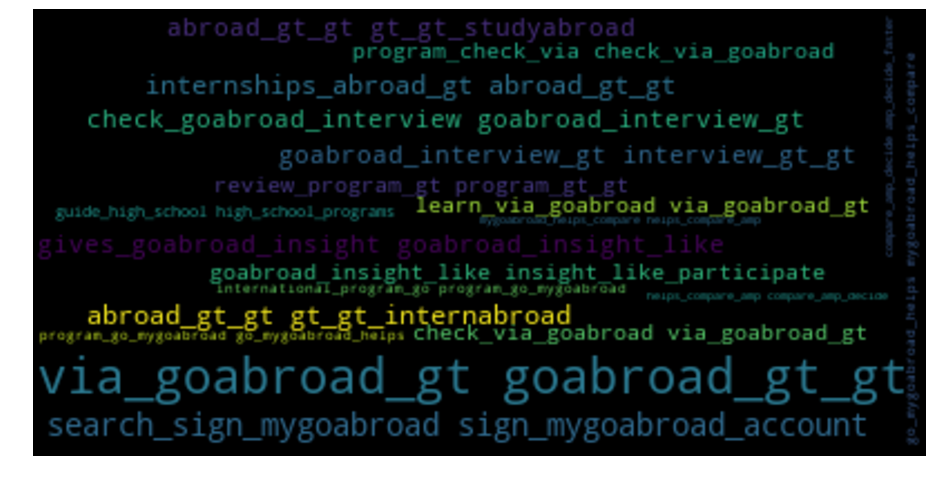

In [109]:
ngram_wordcloud(corpus=clean_data(datasets['GoAbroad']), n=3)